# Let's get started! ⚡

In [120]:
## import Module

# Exploratory Data Analysis
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Data Preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

# Hyperparameter tuning
from hyperopt import hp
from hyperopt import fmin, tpe, Trials
from sklearn.model_selection import cross_val_score
from hyperopt import STATUS_OK

# XGBoost Training
from xgboost import XGBClassifier

# Data Reading

In [121]:
# 데이터 읽어오기
df_train = pd.read_csv('./train.csv')
df_test = pd.read_csv('./test.csv')

In [122]:
# 헤드 확인
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [123]:
# 데이터의 컬럼 수 확인
print(df_train.shape, df_test.shape)

(891, 12) (418, 11)


In [124]:
# 컬럼별 타입과 Null값 확인
print(df_train.info())
print()
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pc

# Exploratory Data Analysis 📊🤔

## 생존여부와 데이터별 인덱스 분리

In [125]:
Survived = df_train['Survived']
train_idx = df_train.index
test_idx = df_test.index

## 학습데이터와 테스트데이터 프레임 합치기

In [126]:
# 쉬운 분석을 위해 학습데이터와 테스트데이터 프레임 합치기
data = pd.concat([df_train.iloc[:,2:], df_test.iloc[:,1:]], axis=0, sort=False)

## 합친 데이터 분석

In [127]:
data.describe()

,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,2.294882,29.881138,0.498854,0.385027,33.295479
std,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.170000,0.000000,0.000000,0.000000
25%,2.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,39.000000,1.000000,0.000000,31.275000
max,3.000000,80.000000,8.000000,9.000000,512.329200


In [128]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1309 non-null   int64  
 1   Name      1309 non-null   object 
 2   Sex       1309 non-null   object 
 3   Age       1046 non-null   float64
 4   SibSp     1309 non-null   int64  
 5   Parch     1309 non-null   int64  
 6   Ticket    1309 non-null   object 
 7   Fare      1308 non-null   float64
 8   Cabin     295 non-null    object 
 9   Embarked  1307 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 112.5+ KB


## 결측치 채우기 위한 분석

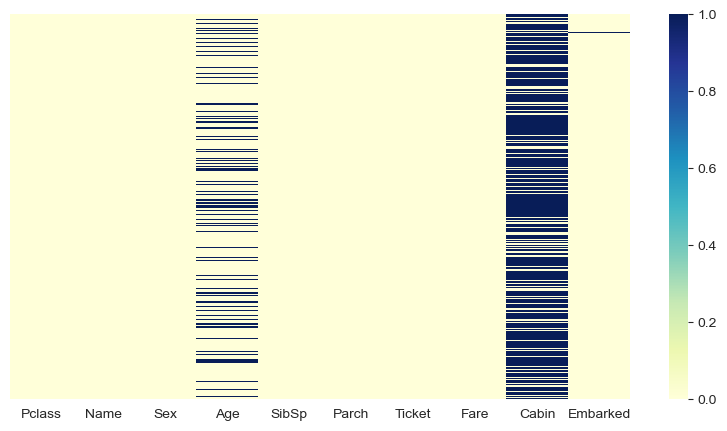

In [129]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,5))
sns.heatmap(data.isna(), yticklabels=False, cmap="YlGnBu")
sns.set
plt.show()

In [130]:
# 'Cabin' 컬럼 드랍
data.drop('Cabin', axis=1, inplace=True)

In [131]:
data[data.Embarked.isna()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [132]:
# 'Pclass'=1인 사람의 Embarked 분포 확인
data[data['Pclass']==1]['Embarked'].value_counts()

Embarked
S    177
C    141
Q      3
Name: count, dtype: int64

<Axes: xlabel='Sex'>

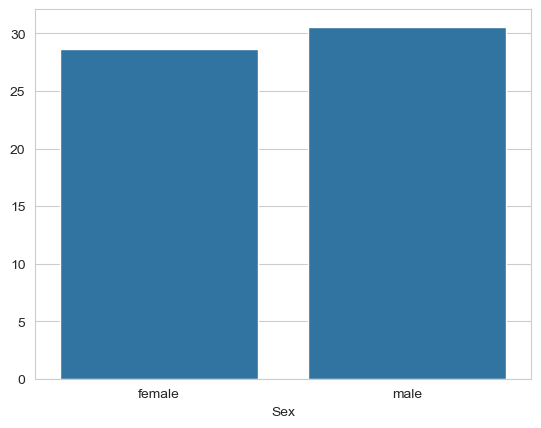

In [133]:
# 'Sex'에 따른 'Age' 분포 표시
sns.barplot(x=data.groupby('Sex')['Age'].agg(np.mean).index, y=data.groupby('Sex')['Age'].agg(np.mean).values)

In [134]:
data.groupby('Sex')['Age'].agg(np.mean)

Sex
female    28.687088
male      30.585228
Name: Age, dtype: float64

<Axes: xlabel='Pclass'>

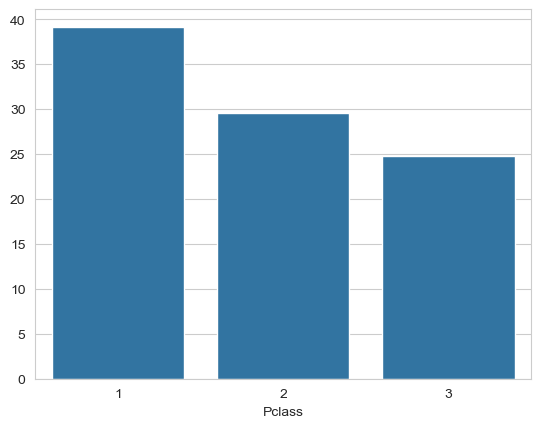

In [135]:
# 'Pclass'에 따른 'Age' 분포 표시
sns.barplot(x=data.groupby('Pclass')['Age'].agg(np.mean).index, y=data.groupby('Pclass')['Age'].agg(np.mean).values)

In [136]:
data.groupby('Pclass')['Age'].agg(np.mean)

Pclass
1    39.159930
2    29.506705
3    24.816367
Name: Age, dtype: float64

In [137]:
data[data.Fare.isna()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
152,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,S


<Axes: xlabel='Fare', ylabel='Count'>

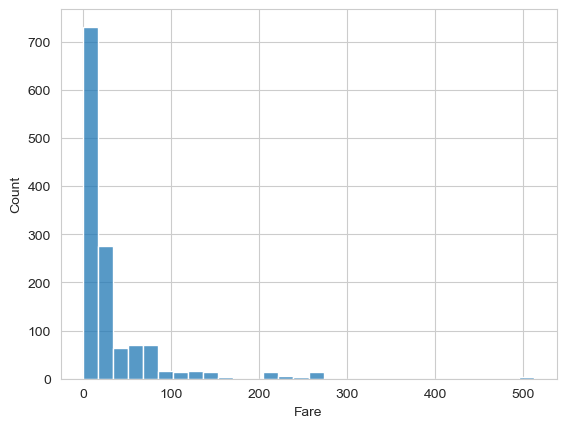

In [138]:
sns.histplot(data.Fare,bins=30)

In [139]:
data.groupby('Pclass')['Fare'].agg(np.mean)

Pclass
1    87.508992
2    21.179196
3    13.302889
Name: Fare, dtype: float64

In [140]:
#Creating subset only for EDA

data_exp = data.iloc[:891]
data_exp['Survived'] = df_train.Survived

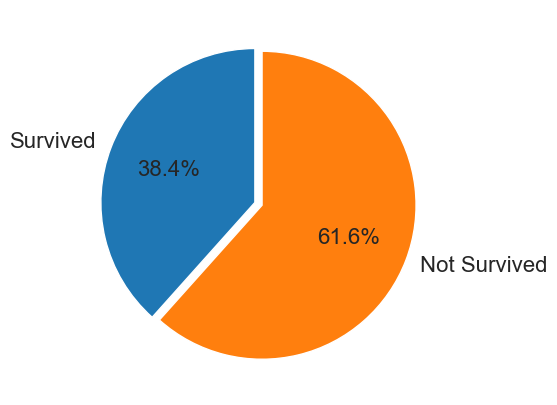

In [141]:
category_names = ['Survived','Not Survived']
size = [data_exp['Survived'].value_counts()[1],data_exp['Survived'].value_counts()[0]]

# Pie chart 
plt.figure(figsize=(5,5), dpi=100)
plt.pie(size, labels=category_names, textprops={'fontsize':16}, startangle=90, autopct='%1.1f%%',
        explode=[0,0.05])
plt.show()

In [142]:
data_exp.groupby('Sex')['Survived'].value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: count, dtype: int64

In [143]:
data_exp.groupby('Survived')['Embarked'].value_counts()

Survived  Embarked
0         S           427
          C            75
          Q            47
1         S           217
          C            93
          Q            30
Name: count, dtype: int64

In [144]:
data_exp.groupby('Survived')['Fare'].agg(['mean','min','max'])

,mean,min,max
Survived,,,
0,22.117887,0.0,263.0000
1,48.395408,0.0,512.3292


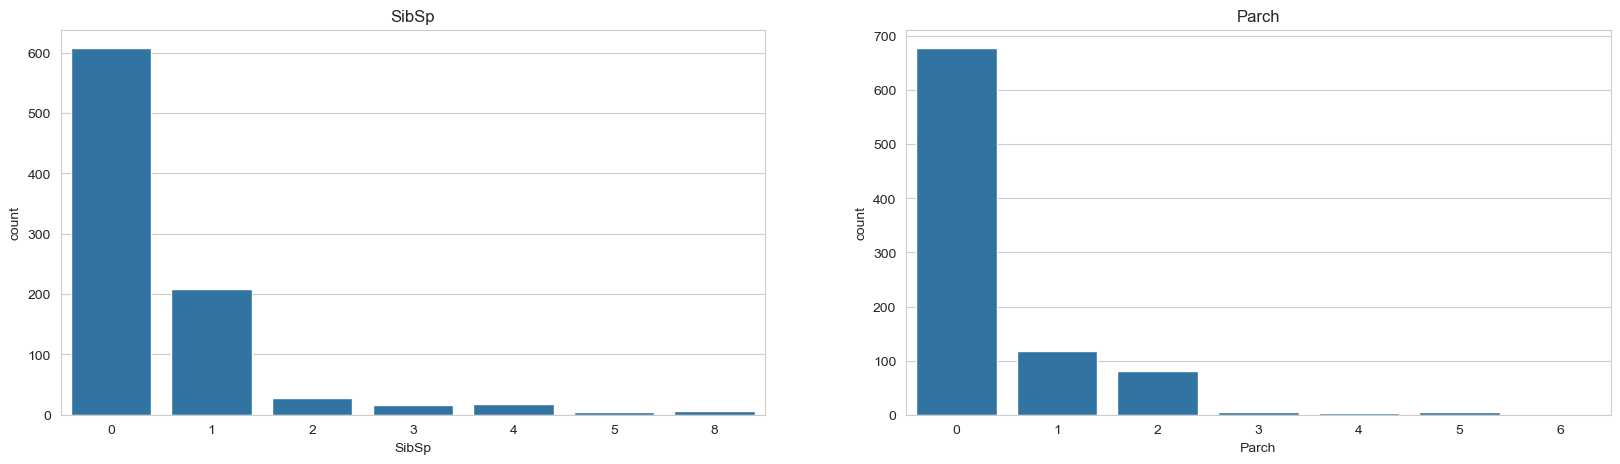

In [145]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(20,5))
sns.barplot(x=data_exp.SibSp.value_counts().index, y=data_exp.SibSp.value_counts(), ax=ax[0]) 
ax[0].set_title('SibSp')
sns.barplot(x=data_exp.Parch.value_counts().index, y=data_exp.Parch.value_counts(), ax=ax[1])
ax[1].set_title('Parch')
plt.show()

In [146]:
data_exp.groupby('Ticket')['Survived'].value_counts()

Ticket       Survived
110152       1           3
110413       1           2
             0           1
110465       0           2
110564       1           1
                        ..
W./C. 6609   0           1
W.E.P. 5734  0           1
W/C 14208    0           1
WE/P 5735    0           1
             1           1
Name: count, Length: 730, dtype: int64

# Data Preprocessing ⚙️🧹

## 1차 전처리 함수 선언

In [147]:
# 학습데이터와 테스트데이터 합치기
def concat_train_test_data(df_train=None, df_test=None):
    df1 = df_train.drop(columns='Survived')
    df = pd.concat([df1, df_test], axis=0, sort=False)
    df['PassengerId'] = df['PassengerId'].astype(int)
    return df

In [148]:
# 'Name' 컬럼에서 'honorific_title' 컬럼 생성하기
# 의미있는 호칭(Mr, Mrs, Miss, Master)을 추출하는 과정입니다.

# 'honorific_title' 생성하는 함수
def get_honorific_title(name=None):
    top4_titles = ('Mr', 'Mrs', 'Miss', 'Master')

    # top4 호칭으로 바꿔줄 소수 여성 호칭
    female_titles_to_Mrs = ('Mme', 'the Countess', 'Dona', 'Lady')
    female_titles_to_Miss = ('Mlle', 'Ms')

    # top4 호칭으로 바꿔줄 소수 남성 호칭
    male_titles_to_Mr = ('Major', 'Col', 'Capt', 'Don', 'Sir', 'Jonkheer', 'Rev')

    # 예 : "Braund, Mr. Owen Harris"에서 'Mr' 추출
    # '.'(마침표) 기준으로 이름을 자르고, ','(콤마) 제거
    honorific_title = name.split('.')[0].split(', ')[-1]

    # 호칭에 따라 변환해서 리턴
    if honorific_title in top4_titles:
        return honorific_title
    elif honorific_title in female_titles_to_Mrs:
        return 'Mrs'
    elif honorific_title in female_titles_to_Miss:
        return 'Miss'
    elif honorific_title in male_titles_to_Mr:
        return 'Mr'
    else:
        return honorific_title

In [149]:
# 남녀 양쪽 전부 존재하는 호칭 처리 함수
def processing_honorific_title_on_both_side(df=None):
    # 조건 설정
    title_on_both_side = ['Dr']
    cond_mr = (df['Sex'] == 'male') & (df['honorific_title'].isin(title_on_both_side))
    cond_mrs = (df['Sex'] == 'female') & (df['honorific_title'].isin(title_on_both_side))
    
    # 치환
    df.loc[cond_mr, 'honorific_title'] = 'Mr'
    df.loc[cond_mrs, 'honorific_title'] = 'Mrs'
    
    return df

In [150]:
# 새 피쳐로 사용할 컬럼 'honorific_title' 생성
def make_honorific_title(df=None):
    df['honorific_title'] = df['Name'].map(get_honorific_title)
    
    # 남녀 양쪽 전부 존재하는 호칭에 대한 처리
    df = processing_honorific_title_on_both_side(df)
    
    return df

In [151]:
# 'Surname'(성씨) 생성 후 가족별로 묶기
def make_Surname_FamilyGroup(df=None):
    df['Surname'] = df['Name'].map(lambda name: name.split(',')[0].strip())
    surname_counts = df['Surname'].value_counts()
    df['FamilyGroup'] = df['Surname'].map(surname_counts)
    return df

In [152]:
# 'Family', 'IsAlone' 생성
def make_Family_IsAlone(df=None):
    df['Family'] = df['SibSp'].astype(int) + df['Parch'].astype(int)
    df['IsAlone'] = (df['Family'] <= 1).astype(int)
    return df

In [153]:
# 'Cabin' 컬럼 매핑
def mapping_Cabin(df=None):
    df['Cabin'].fillna('Unknown', inplace=True)
    cabin_mapping = {cabin[0]: idx for idx, cabin in enumerate(sorted(set(cabin[0] for cabin in df['Cabin'].unique())))}
    df['Cabin'] = df['Cabin'].map(lambda x: cabin_mapping[x[0]])
    return df

In [154]:
# 'TicketGroup' 컬럼 생성
def make_TicketGroup(df=None):
    df["TicketGroup"] = df["Ticket"].map(
        df["Ticket"].value_counts()
    )
    return df

In [155]:
# 'Ticket' 종류별로 묶기
def categorize_Ticket(df=None):
    def process_ticket(data):
        # 단순 숫자만 있는 티켓들 분류
        number_ticket = data[data["Ticket"].str.isdigit()].copy()
        number_ticket['Ticket'] = number_ticket['Ticket'].astype(int)
        number_ticket.loc[number_ticket['Ticket'] <= 100000, 'Ticket'] = 14
        number_ticket.loc[(number_ticket['Ticket'] > 100000) & (number_ticket['Ticket'] <= 200000), 'Ticket'] = 15
        number_ticket.loc[(number_ticket['Ticket'] > 200000) & (number_ticket['Ticket'] <= 300000), 'Ticket'] = 13
        number_ticket.loc[(number_ticket['Ticket'] > 300000) & (number_ticket['Ticket'] <= 400000), 'Ticket'] = 5
        number_ticket.loc[number_ticket['Ticket'] > 3000000, 'Ticket'] = 6
        
        # 알파벳 포함된 티켓들을 종류별로 분류
        num_alpha_ticket = data[data["Ticket"].str.contains('[^\d]', na=False)].copy()
        num_alpha_ticket.loc[num_alpha_ticket['Ticket'].str.match('A.+', na=False), 'Ticket'] = 1
        num_alpha_ticket.loc[num_alpha_ticket['Ticket'].str.match('C\.*A\.*.+', na=False), 'Ticket'] = 8
        num_alpha_ticket.loc[num_alpha_ticket['Ticket'].str.match('PC.+', na=False), 'Ticket'] = 16
        num_alpha_ticket.loc[num_alpha_ticket['Ticket'].str.match('PP.+', na=False), 'Ticket'] = 18
        num_alpha_ticket.loc[num_alpha_ticket['Ticket'].str.match('SOTON.+', na=False), 'Ticket'] = 3
        num_alpha_ticket.loc[num_alpha_ticket['Ticket'].str.match('STON.+', na=False), 'Ticket'] = 11
        num_alpha_ticket.loc[num_alpha_ticket['Ticket'].str.match('LINE.*', na=False), 'Ticket'] = 7
        num_alpha_ticket.loc[num_alpha_ticket['Ticket'].str.match('F\.C\.(C\.)*.+', na=False), 'Ticket'] = 17
        num_alpha_ticket.loc[num_alpha_ticket['Ticket'].str.match('W.+', na=False), 'Ticket'] = 4
        num_alpha_ticket.loc[num_alpha_ticket['Ticket'].str.match('C.+', na=False), 'Ticket'] = 9
        num_alpha_ticket.loc[num_alpha_ticket['Ticket'].str.match('S(\.)*C.+', na=False), 'Ticket'] = 12
        num_alpha_ticket.loc[num_alpha_ticket['Ticket'].str.match('S(\.)*O.+', na=False), 'Ticket'] = 2
        num_alpha_ticket.loc[num_alpha_ticket['Ticket'].str.match('[^\d](Fa)*(P/PP)*(S\.P)*(S\.*W)*.+', na=False), 'Ticket'] = 10
        num_alpha_ticket['Ticket'] = num_alpha_ticket['Ticket'].apply(lambda x: int(x) if pd.notna(x) else x)

        processed_data = pd.concat([number_ticket, num_alpha_ticket])

        return processed_data

    # 처리
    data_processed = process_ticket(df)
    
    # 다시 합치기
    df = df.merge(data_processed[['PassengerId', 'Ticket']], on='PassengerId', how='left')
    df = df.drop('Ticket_x', axis=1)
    
    return df

In [156]:
# 필요없는 컬럽들 드랍 함수
def drop_columns(df=None):
    # 'PassengerId' 컬럼
    df = df.drop(columns=['PassengerId'])
    
    # 'Name' 컬럼
    df = df.drop(columns=['Name'])
    
    # 'Surname' 컬럼
    df = df.drop(columns=['Surname'])
    
    # 'SibSp', 'Parch' 컬럼
    # df = df.drop(columns=['SibSp','Parch'])
    
    # 'Family' 컬럼
    df = df.drop(columns=['Family'])
        
    return df

## 1차 전처리 함수 모음

In [157]:
# 1차 전처리 함수 모음
def first_preprocessing(df_train=None, df_test=None):
    # 학습데이터와 전처리데이터 합치기
    df = concat_train_test_data(df_train, df_test)
    
    # 호칭 만들기
    df = make_honorific_title(df)
    
    # 'Surname'(성씨) 생성 후 가족별로 묶기
    df = make_Surname_FamilyGroup(df)
    
    # 'Family', 'IsAlone' 생성
    df = make_Family_IsAlone(df)
    
    # 'Cabin' 컬럼 매핑
    df = mapping_Cabin(df)
    
    # 'TicketGroup' 컬럼 생성
    df = make_TicketGroup(df)
    
    # 'Ticket' 종류별로 묶기
    df = categorize_Ticket(df)
    
    # 필요없는 컬럼 삭제
    df = drop_columns(df)
       
    return df

In [158]:
# 1차 전처리 함수 실행
df = first_preprocessing(df_train, df_test)

## 1차 전처리 후 통계 확인

<Axes: xlabel='honorific_title'>

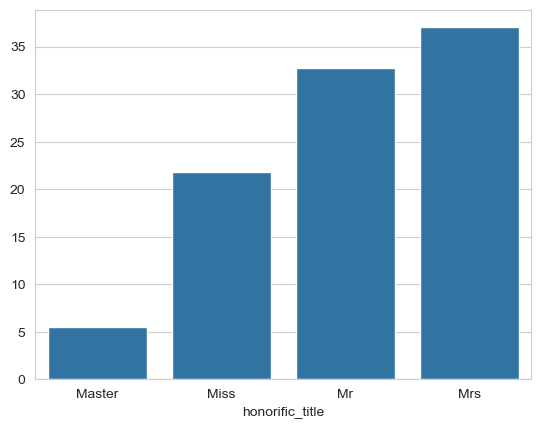

In [159]:
# 'honorific_title'에 따른 'Age' 분포 표시
sns.barplot(x=df.groupby('honorific_title')['Age'].agg(np.mean).index, y=df.groupby('honorific_title')['Age'].agg(np.mean).values)

<Axes: xlabel='Age', ylabel='honorific_title'>

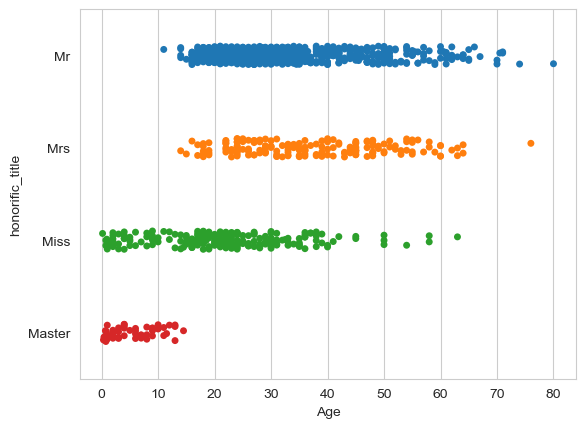

In [160]:
# Plot the distribution of Ages for each group
sns.stripplot(
      data=df
    , x='Age'
    , y='honorific_title'
    , hue='honorific_title'
)

In [161]:
df.groupby('honorific_title')['Age'].agg({'mean', 'median', 'max'})

,mean,median,max
honorific_title,,,
Master,5.482642,4.0,14.5
Miss,21.824366,22.0,63.0
Mr,32.784298,30.0,80.0
Mrs,37.040000,36.0,76.0


<Axes: xlabel='Fare', ylabel='Pclass'>

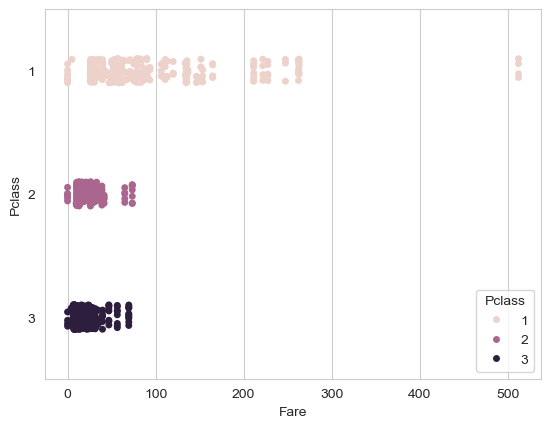

In [162]:
sns.stripplot(
      data=df
    , x='Fare'
    , y='Pclass'
    , hue='Pclass'
    , orient='h'
)

In [163]:
df.groupby('Pclass')['Fare'].agg({'mean', 'median', 'max'})

,mean,median,max
Pclass,,,
1,87.508992,60.0000,512.3292
2,21.179196,15.0458,73.5000
3,13.302889,8.0500,69.5500


In [164]:
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,honorific_title,FamilyGroup,IsAlone,TicketGroup,Ticket_y
0,3,male,22.0,1,0,7.2500,8,S,Mr,2,1,1,1
1,1,female,38.0,1,0,71.2833,2,C,Mrs,2,1,2,16
2,3,female,26.0,0,0,7.9250,8,S,Miss,1,1,1,11
3,1,female,35.0,1,0,53.1000,2,S,Mrs,2,1,2,15
4,3,male,35.0,0,0,8.0500,8,S,Mr,2,1,1,5


## 2차 전처리 함수 선언

### Imputer 함수 선언

In [165]:
# 'Age' 컬럼 결측치 채우기
def Age_Imputer(df=None):
    def fn(honorific_title=None, age=None):
        if np.isnan(age):
            if honorific_title == 'Master':
                return 5.48
            elif honorific_title == 'Miss':
                return 21.82
            elif honorific_title == 'Mr':
                return 32.78
            elif honorific_title == 'Mrs':
                return 37.04
        else:
            return age
    
    df['Age'] = df[['honorific_title', 'Age']].apply(lambda x: fn(x['honorific_title'], x['Age']),axis=1)
    df['Age'] = df['Age'].astype('int64')
    
    return df

In [166]:
# 'Fare' 컬럼 결측치 채우기
def Fare_Imputer(df=None):
    def fn(pclass=None, fare=None):
        if np.isnan(fare):
            if pclass == 1:
                return 60.0
            elif pclass == 2:
                return 15.04
            elif pclass == 3:
                return 8.05
        else:
            return fare
    
    df['Fare'] = df[['Pclass', 'Fare']].apply(lambda x: fn(x['Pclass'], x['Fare']),axis=1)
    
    return df

In [167]:
# 'Embarked' 컬럼 결측치 채우기
def Embarked_Imputer(df):
    # Null인 두 사람이 전부 Pclass=1 => '1'에는 'S'가 제일 많다.
    df.loc[df['Embarked'].isnull(), 'Embarked'] = 'S'
    return df

In [168]:
# 결측치 채우는 함수
def Data_Imputer(df=None):
    df = Age_Imputer(df)
    df = Fare_Imputer(df)
    df = Embarked_Imputer(df)
    return df

### 결측치 채운 후 전처리 함수 선언

In [169]:
# 'AgeCatogary' 생성
def make_AgeCategory(df=None):
    df['AgeCategory'] = pd.cut(df['Age'], bins=[-1, 18, 36, np.inf], labels=[1, 2, 3]).astype(int)
    return df

In [170]:
# 'IsChild', 'WomenChildren' 생성
def make_isChild_WomenChildren(df=None):
    df['IsChild'] = (df['Age'] < 18).astype(int)
    df['WomenChildren'] = ((df['Sex'] == 'female') | (df['IsChild'] == 1)).astype(int)
    return df

In [171]:
# 레이블 인코딩
def label_encoder(df=None):
    encoder = LabelEncoder()
    # 'Sex', 'Embarked', 'honorific_title' 컬럼을 레이블 인코딩
    columns =  ['Sex', 'Embarked', 'honorific_title']
    for column in columns:
        df[column] = encoder.fit_transform(df[column])
    
    return df

In [172]:
#  원핫 인코딩
def one_hot_encoder(df=None):
    return df

In [173]:
# 'Age', 'Fare' 스케일링
def Age_Fare_scalar(df=None):
    scalar = MinMaxScaler()
    df[['Age', 'Fare']] = scalar.fit_transform(df[['Age', 'Fare']])
    return df

In [174]:
# 컬럼명을 강제로 str로 형변환
def columns_index_to_str_type(df=None):
    df.columns = df.columns.astype(str)
    return df

## 2차 전처리 함수 모음

In [175]:
# 2차 전처리 함수 모음
def second_preprocessing(df=None):
    # 결측치 채우기
    df = Data_Imputer(df)
    
    # 'AgeCatogary' 생성
    df = make_AgeCategory(df)
    
    # 'IsChild', 'WomenChildren' 생성
    df = make_isChild_WomenChildren(df)
    
    # 레이블 인코딩
    df = label_encoder(df)
    
    # 원핫 인코딩
    # df = one_hot_encoder(df)
       
    # 'Age', 'Fare' 스케일링
    df = Age_Fare_scalar(df)
    
    # 컬럼명을 강제로 str로 형변환
    df = columns_index_to_str_type(df)
    
    return df

In [176]:
# 2차 전처리 함수 실행
df = second_preprocessing(df)

## 전처리 결과 확인

### 결측치 존재여부 확인

In [177]:
df.isnull().sum()

Pclass             0
Sex                0
Age                0
SibSp              0
Parch              0
Fare               0
Cabin              0
Embarked           0
honorific_title    0
FamilyGroup        0
IsAlone            0
TicketGroup        0
Ticket_y           0
AgeCategory        0
IsChild            0
WomenChildren      0
dtype: int64

### 피어슨 계수 행렬 시각화

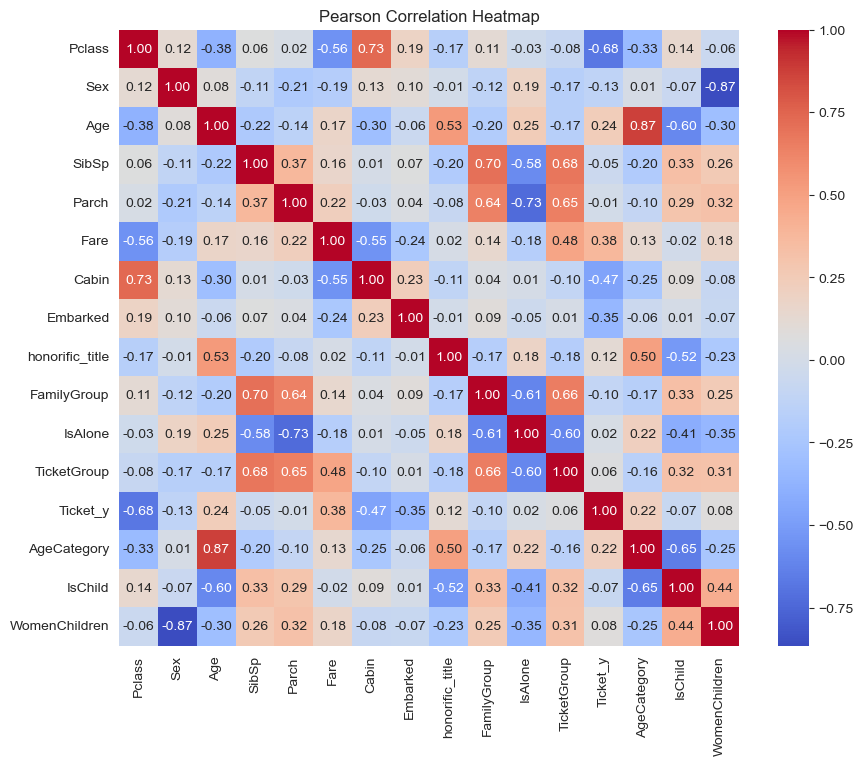

In [178]:
# 피어슨 계수 행렬 시각화
corr_matrix = pd.get_dummies(df).corr(method='pearson')

plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix, annot=True, cmap='coolwarm', fmt=".2f"
)
plt.title("Pearson Correlation Heatmap")
plt.show()

### 데이터프레임 확인

In [179]:
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,honorific_title,FamilyGroup,IsAlone,TicketGroup,Ticket_y,AgeCategory,IsChild,WomenChildren
0,3,1,0.2750,1,0,0.014151,8,2,2,2,1,1,1,2,0,0
1,1,0,0.4750,1,0,0.139136,2,0,3,2,1,2,16,3,0,1
2,3,0,0.3250,0,0,0.015469,8,2,1,1,1,1,11,2,0,1
3,1,0,0.4375,1,0,0.103644,2,2,3,2,1,2,15,2,0,1
4,3,1,0.4375,0,0,0.015713,8,2,2,2,1,1,5,2,0,0


# XGBoost Training 🏋️‍♂️

## 학습데이터와 테스트데이터 분리

In [180]:
train_set = df.iloc[:891,]
test_set = df.iloc[891:,]

In [181]:
# 학습데이터의 데이터와 답 분리
X_train = train_set
y_train = df_train['Survived']

# 테스트데이터 생성
X_test = test_set

## 하이퍼파라미터 튜닝

In [182]:
# 학습데이터와 검증데이터 분리
X_tr, X_val, y_tr, y_val = train_test_split(
      X_train
    , y_train
    , test_size=0.1
    , random_state=42
    , stratify=y_train
)

In [183]:
# 1 step : search space 설정, XGBosst 하이퍼파라미터들의 범위 지정
xgb_search_space = {
      'max_depth' : hp.quniform('max_depth', 3, 20, 1) # return float
    , 'min_child_weight' : hp.quniform('min_child_weight', 1, 5, 1)
    , 'learning_rate' : hp.uniform('learning_rate', 0.01, 0.2)
    , 'colsample_bytree' : hp.uniform('colsample_bytree', 0.5, 1)
}

In [184]:
# 2 step : objective function => return acccuracy, auc
def objective_func(search_space):
    xgb_clf = XGBClassifier(
          n_estimators=200
        , max_depth=int(search_space['max_depth'])
        , min_child_weight=int(search_space['min_child_weight'])
        , learning_rate=search_space['learning_rate']
        , colsample_bytree=search_space['colsample_bytree']
        , eval_metric='logloss'
    )
    accuracy = cross_val_score( # returns [정확도, 정확도, ..., 정확도]
          xgb_clf # 교차검증할 알고리즘 적용, 사이킷런 기반 알고리즘들은 다 들어갈 수 있다.
        , X_train # 전체 학습데이터
        , y_train # 전체 학습데이터의 답
        , scoring='accuracy'
        , cv=3
    ) # -1(-100), -0.8(-80)
    return {'loss':-1*np.mean(accuracy), 'status':STATUS_OK}

In [185]:
# 3 STEP : fmin => best
trial_val = Trials() # 결과 저장하는 객체
best = fmin(
      fn=objective_func
    , space=xgb_search_space
    , algo=tpe.suggest
    , max_evals=50
    , trials=trial_val # 중간 결과 저장
    , rstate=np.random.default_rng(seed=42)
)

  0%|          | 0/50 [00:00<?, ?trial/s, best loss=?]

100%|██████████| 50/50 [00:21<00:00,  2.27trial/s, best loss: -0.8462401795735129]


In [186]:
print(f'best : {best}')
print(best['learning_rate'])

best : {'colsample_bytree': 0.7867304847087326, 'learning_rate': 0.02027479614439496, 'max_depth': 16.0, 'min_child_weight': 4.0}
0.02027479614439496


In [187]:
# 4 STEP : BEST MODEL
xgb_clf = XGBClassifier(
      n_estimatior=200
    , learning_rate=round(best['learning_rate'],5)
    , max_depth=int(best['max_depth'])
    , min_child_weight=int(best['min_child_weight'])
    , colsample_bytree=round(best['colsample_bytree'],5)
)

# Submission File 🏆🎯

In [188]:
# 위에서 찾은 최적의 hyperparameters set을 이용한 최고의 모델 생성
# 조기 종료 처리 => 검증데이터 필요
evals = [(X_tr,y_tr),(X_val,y_val)]
# 학습 진행
xgb_clf.fit(
      X_tr
    , y_tr
    , early_stopping_rounds=50
    , eval_metric='logloss'
    , eval_set=evals
    , verbose=True
)

[0]	validation_0-logloss:0.65570	validation_1-logloss:0.66006
[1]	validation_0-logloss:0.64625	validation_1-logloss:0.65170
[2]	validation_0-logloss:0.63651	validation_1-logloss:0.64371
[3]	validation_0-logloss:0.62794	validation_1-logloss:0.63662
[4]	validation_0-logloss:0.61955	validation_1-logloss:0.63030
[5]	validation_0-logloss:0.61140	validation_1-logloss:0.62300
[6]	validation_0-logloss:0.60350	validation_1-logloss:0.61611
[7]	validation_0-logloss:0.59556	validation_1-logloss:0.61036
[8]	validation_0-logloss:0.58810	validation_1-logloss:0.60368
[9]	validation_0-logloss:0.58145	validation_1-logloss:0.59806
[10]	validation_0-logloss:0.57472	validation_1-logloss:0.59169
[11]	validation_0-logloss:0.56865	validation_1-logloss:0.58720
[12]	validation_0-logloss:0.56190	validation_1-logloss:0.58181
[13]	validation_0-logloss:0.55529	validation_1-logloss:0.57687
[14]	validation_0-logloss:0.54864	validation_1-logloss:0.57245
[15]	validation_0-logloss:0.54320	validation_1-logloss:0.56758
[1

[72]	validation_0-logloss:0.36951	validation_1-logloss:0.46136
[73]	validation_0-logloss:0.36812	validation_1-logloss:0.46114
[74]	validation_0-logloss:0.36664	validation_1-logloss:0.46033
[75]	validation_0-logloss:0.36506	validation_1-logloss:0.46006
[76]	validation_0-logloss:0.36343	validation_1-logloss:0.45967
[77]	validation_0-logloss:0.36200	validation_1-logloss:0.45950
[78]	validation_0-logloss:0.36043	validation_1-logloss:0.45921
[79]	validation_0-logloss:0.35888	validation_1-logloss:0.45920
[80]	validation_0-logloss:0.35748	validation_1-logloss:0.45917
[81]	validation_0-logloss:0.35608	validation_1-logloss:0.45864
[82]	validation_0-logloss:0.35475	validation_1-logloss:0.45832
[83]	validation_0-logloss:0.35373	validation_1-logloss:0.45776
[84]	validation_0-logloss:0.35220	validation_1-logloss:0.45743
[85]	validation_0-logloss:0.35102	validation_1-logloss:0.45711
[86]	validation_0-logloss:0.35000	validation_1-logloss:0.45658
[87]	validation_0-logloss:0.34886	validation_1-logloss:

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.78673, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.02027, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=16, max_leaves=None,
              min_child_weight=4, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimatior=200, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [189]:
# 테스트데이터 넣어서 예측
pred = xgb_clf.predict(X_test)

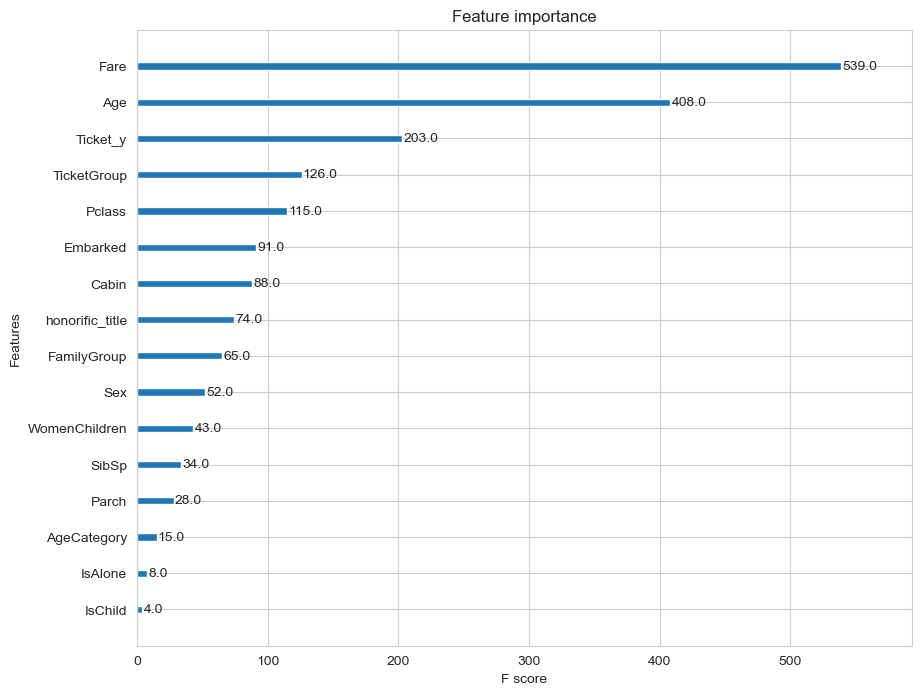

In [190]:
# 피처 중요도 시각화
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10,8))
plot_importance(xgb_clf, ax=ax)
plt.show()

In [191]:
# 제출파일 준비: PassengerId - Survived
submission = pd.DataFrame({
    'PassengerId' : df_test['PassengerId'],
    'Survived' : pred
})

submission['Survived'] = submission['Survived'].astype(int)

In [192]:
# 제출파일 저장
submission.to_csv('submission.csv', index=False)
print('your submission file is saved!')

your submission file is saved!


## 채점하기

In [193]:
# 생성된 데이터 파일과 솔루션 불러오기
# 파일 경로 적절히 수정해서 쓰세요.
submission = pd.read_csv('./submission.csv')
solution = pd.read_csv('./solution.csv')

In [194]:
# 채점 테이블 생성
marking = submission.merge(solution, on='PassengerId')
marking.columns = ['PassengerId', 'Submission', 'Solution']

# 'Check' : 맞으면 1, 틀리면 0
marking['Check'] = 0

In [195]:
# 채점
cond = marking['Submission'] == marking['Solution']
marking.loc[cond, 'Check'] = 1

# 정답 계산 및 출력
result = marking['Check'].sum() / marking.shape[0]
print('정답: {0:.5f}'.format(result))

정답: 0.78947
